In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

df = pd.read_csv('data.csv', on_bad_lines="warn", delimiter=";")
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


Want to predict 'Rundvekt' for the Supervised Learning part, this will inform the columns we decide to drop.
But how can we tell which columns will predict 'Rundvekt', and which we should drop? 
Want to run a correlation test on all columns against 'Rundvekt', but some data needs to be converted into bool/number first.

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

To start, we can safely drop columns where the data is present in other columns

In [234]:
df = df.drop(labels=["Meldingsdato","Meldingsklokkeslett","Startdato","Startklokkeslett", "Stoppdato", "Stoppklokkeslett", "Lengdegruppe (kode)", "Lengdegruppe"], axis=1)
df = df.drop(labels=["Hovedart FAO (kode)","Hovedart FAO","Hovedart - FDIR (kode)","Art - gruppe","Art - gruppe (kode)", "Art - FDIR (kode)", "Art - FDIR", "Redskap FDIR (kode)", "Redskap FDIR"], axis=1)



While Havdybde, Hovedområde, Lokasjon, Start/Sluttposisjon are all likely useful for predicting the type of fish that is caught, we already know the fish type and want to predict Rundvekt. There is a possibility that the location of the fish affects how much is caught.  

In [235]:
df = df.drop(labels=["Startposisjon bredde", "Startposisjon lengde", "Hovedområde start (kode)", "Hovedområde start", "Lokasjon start (kode)", "Havdybde start", "Stopposisjon bredde","Stopposisjon lengde", "Hovedområde stopp (kode)", "Hovedområde stopp", "Lokasjon stopp (kode)", "Havdybde stopp" ], axis=1)

Next we notice that Start/Stop times are inconsistent. We therefore filter out Start/Stop times which do not contain ':'. This way we can trust the 'Varighet' column more.
Furthermore, 'Fartøylengde' is written with ',' and not '.'. We change ',' to '.' and cast to float datatype.

In [236]:
df = df[df["Starttidspunkt"].str.contains(":")]
df = df[df["Stopptidspunkt"].str.contains(":")]
df["Fartøylengde"] = df["Fartøylengde"].str.replace(",", ".").astype("float")
df["Bredde"] = df["Bredde"].str.replace(",", ".").astype("float")



Next we need to convert the categorical column values we _do_ want to use into machine-readable data. In this case we use the built-in get_dummies function to create boolean columns.

In [237]:
# Turn categorical data into boolean values, first remove their original numeric counterpart 
#df = df.drop(labels=["Art FAO (kode)", "Redskap FAO (kode)"], axis=1)


# categoricalColumns = ["Art FAO",  "Redskap FAO"]

# for c in categoricalColumns:

species_columns = pd.get_dummies(df["Art FAO"], dtype="float")
species_columns_multiplied = species_columns.multiply(df["Rundvekt"], axis="index")
df = pd.concat([df,species_columns_multiplied], axis=1)


tool_columns = pd.get_dummies(df["Redskap FAO"])
df = pd.concat([df,tool_columns], axis=1)
    # df = df.drop([c], axis=1)




In [239]:
df = df.drop(["Art FAO", "Redskap FAO", "Art FAO (kode)", "Redskap FAO (kode)"], axis=1)

In order to use 'Bruttotonnasje' one option is to pick one of the columns, delete the other one and drop all n/a values.
We decided on a slightly different approach in order to preserve more rows.
We base the 'Bruttotonnasje' value on the standard 'Bruttotonnasje 1969' and instead of dropping rows right away, we check if the row contains a value in 'Bruttotonnasje annen', and use that.
Rows with missing values in both columns are dropped.


In [240]:

df = df.dropna(subset=["Bruttotonnasje 1969", "Bruttotonnasje annen"], how='all')
df["Bruttotonnasje"] = df["Bruttotonnasje 1969"].fillna(df["Bruttotonnasje annen"])
df = df.drop(["Bruttotonnasje 1969", "Bruttotonnasje annen"], axis=1)


It should be noted that 'Bruttotonnasje' is pretty well explained by 'Fartøylengde', although in a non-linear fashion. In light of this, we could probably omit either 'Bruttotonnasje' or the boat dimensions.
See graph.

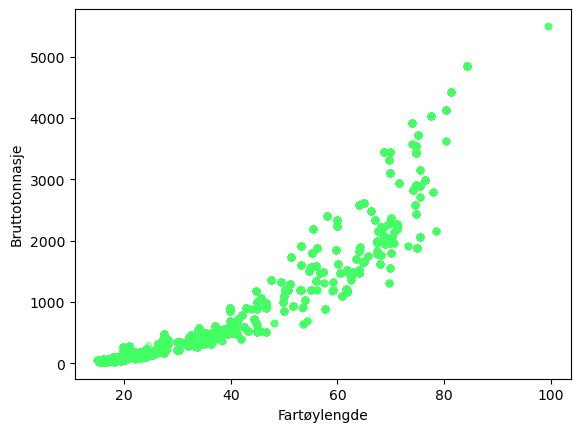

In [242]:

df.plot(kind = 'scatter', x = 'Fartøylengde', y = 'Bruttotonnasje', c="#43ff640d")
plt.show()

In [261]:
species_dict = dict.fromkeys(species_columns_multiplied, "sum")
tool_dict= dict.fromkeys(tool_columns, "first")

catch_dict = {
        "Varighet": "mean",
        "Fangstår": "mean",
        "Trekkavstand": "mean",
        "Bredde": "mean",
        "Fartøylengde" : "mean",
        "Bruttotonnasje": "mean",
        "Rundvekt": "sum",

    }
master_dict = {**catch_dict,**species_dict, **tool_dict }

In [262]:
grouped = df.groupby(by=["Melding ID", "Starttidspunkt", "Stopptidspunkt"]).agg(master_dict).reset_index()
grouped.shape
grouped

,Melding ID,Starttidspunkt,Stopptidspunkt,Varighet,Fangstår,Trekkavstand,Bredde,Fartøylengde,Bruttotonnasje,Rundvekt,Akkar,Annen flatfisk,Annen flyndre,Annen laksefisk,Annen makrell,Annen marin fisk,Annen sardin,Annen skate og rokke,Annen torskefisk,Ansjos,Antarktisk krill,Antarktisk tannfisk,Blekkspruter uspes.,Blåhval,Blåkjeft,Blåkveite,Blålange,Blåsteinbit,Blæretang,Breiflabb,Brisling,Brosme,Bukstripet pelamide,Burton-skate,Common squids nei *,Dyphavsabbor,Dypvannsreke,Flekksteinbit,Forkbeard *,Gapeflyndre,Glassvar,Gråsteinbit,Gulringskate,Hakes nei. *,Havmus,Havål,Hestmakrell,Hummer,Hvitting,Hyse,Håbrann,Hågjel,Inshore squids nei *,Isgalt,Islandshå,Isskate,Knurr,Knurr uspes.,Kolmule,Kongekrabbe,Kortpigget hå,Kveite,Laksesild,Lange,Lanternfishes nei *,Lodde,Lomre,Lusuer,Lyr,Lysing,Makrell,Makrellstørje,Mora uspes.,Nise,Nordlig lysprikkfisk,Pigghå,Piggskate,Piggvar,Pink cusk-eel*,Raudåte,Reke av Palaemonidaefamilien,Reke av Pandalusslekten,Rognkjeks (felles),Rundskate,Rødknurr,Rødpølse,Rødspette,Sagtang,Sandflyndre,Sandskate,Sandtunge,Sanktpetersfisk,Sei,Sild,Sjøkreps,Sjøpiggsvin uspes.,"Skate, uspesifisert","Skater, upes.",Skjeggtorsk,Skjellbrosme,Skolest,Skrubbe,Slettvar,Slimål,Smørflyndre,Snabeluer,Snøkrabbe,Southern hake*,Spisskate,Steinbiter,Stortare,Strømsild,Strømsild/Vassild,Svabergsjøpiggsvin,Svarthå,Svartskate,Sypike,Sølvtorsk,Taskekrabbe,Tobis og annen sil,Torsk,Trollkrabbe,Uer (vanlig),Uer uspes.,Vanlig fløyfisk,Vanlig ulke,Various squids nei *,Vassild,Villsvinfisk,Vågehval,Ål,Øyepål,Andre liner,Annen trål (udefinert),Boat /vessel seines -Pair seines,Bunntrål (uspes),"Bunntrål, otter","Bunntrål, par","Bunntrål, reke",Dorg/harp/snik,Encircling gillnets*,"Flytetrål, otter","Flytetrål, par","Flytetrål, reke","Flytetrål, uspesifisert",Gillnets and entangling nets (unspec)*,"Harpun,div.","Juksa/pilk, manuell",Otter dobbeltrål,"Partrål, uspesifisert",Settegarn,Setteline,"Skrape, mekanisert",Snurpenot/ringnot,"Snurpenot/ringnot, et fartøy","Snurpenot/ringnot, to fartøy",Snurrevad,"Snurrevad, dansk","Snurrevad, skotsk",Teiner,Udefinert garn,Udefinert trål
0,1497178,30.12.2017 23:21,31.12.2017 04:16,295.0,2017.0,3970.0,12.60,56.80,1476.0,18434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1497178,31.12.2017 05:48,31.12.2017 10:15,267.0,2017.0,11096.0,12.60,56.80,1476.0,16062.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1497178,31.12.2017 11:34,31.12.2017 16:49,315.0,2017.0,10215.0,12.60,56.80,1476.0,17878.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12432.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [263]:
# grouped.corr(method="pearson", numeric_only=True)["Rundvekt"]

Melding ID          -0.059011
Varighet            -0.036950
Fangstår             0.000395
Trekkavstand         0.001820
Bredde               0.179122
                       ...   
Snurrevad, dansk    -0.004136
Snurrevad, skotsk   -0.094738
Teiner              -0.082077
Udefinert garn      -0.021574
Udefinert trål      -0.003507
Name: Rundvekt, Length: 160, dtype: float64

**Supervised Learning**

TODO: Preprocessing of data with reasoning 

TODO: Build 3 supervised learning models, one of which needs to be a deep learning model

KNN (regressor), nevralt nett (deep learning, pytorch, keras, tensorflow), spicy learning model 

**Unsupervised Learning (Clustering Model)**

TODO: Preprocessing of data with reasoning

TODO: Build Clustering Model 

**Results and comments**

TODO: "write a summary of your results, and discuss consequences of such results."
